In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

# Problem Set 4 (covers Lab 7)

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Introduction

Lab 7 was all about statistical inference, specifically, Bayesian statistical inference. You will use Bayesian inference on four  problems for this Problem Set [Goto Q1](#q1). You can paste all your code here:

In [3]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)


<a id="q1"></a>
**Question 1.**

Fifteen volunteers were put on the Supper Dooper Human Kibble Diet(tm) for a month. They were weighed before and after 30 days. The makers of Supper Dooper Human Kibble Diet(tm) are anxious to see the results of this study because they are planning to offer a money back guarantee of "Lose 10 Pounds in 30 days or your money back!".

Based on the data, 

1. what is the probability that this claim can be made? 
2. If daily weight fluctuations can equal 5 pounds (in either direction). How probable is it that the diet doesn't work?
3. Is there a positive claim can be made with at least ~66% belief?

In [4]:
data1 = {}
data1["start"] = [129, 174, 200, 229, 205, 133, 143, 222, 161, 201, 194, 181, 185, 126, 212]
data1["end"] = [134, 171, 190, 227, 206, 130, 129, 218, 138, 187, 191, 177, 183, 124, 205]

- Calculate the main statistics of the sample data

In [5]:
start_mean = np.mean(data1["start"])
end_mean = np.mean( data1["end"])
print( "weight - start mean = %.2f" %(start_mean))
print( "weight - end mean = %.2f" %(end_mean))
print( "difference = %.2f" %(start_mean - end_mean))

weight - start mean = 179.67
weight - end mean = 174.00
difference = 5.67


- Generate the bootstrap data for each

The Bootstrap samples are an estimation of the posterior distribution, usually arrived at using Bayes Rule:

In [6]:
start_posterior = bootstrap_sample( data1["start"], np.mean, 1000)
end_posterior = bootstrap_sample( data1["end"], np.mean, 1000)

- Calculate the difference

Each element of each posterior is just a different possible theta. If we match each of the possible thetas by index, we have a possible index. As a result, we have generated a bootstrap sample of the *differences*.

In [7]:
difference = start_posterior - end_posterior

4. Plot the posterior distributions

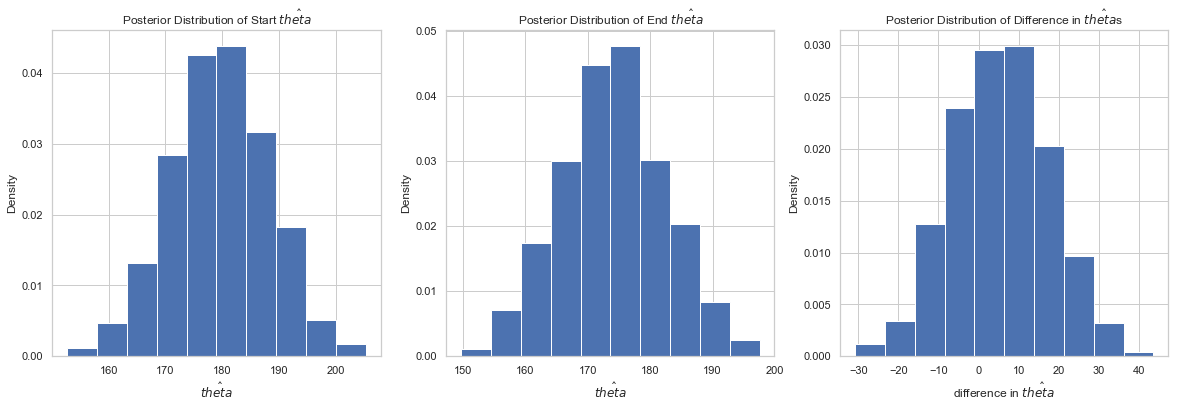

In [8]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)

axes.hist( start_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Start $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( end_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of End $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

- 90% BCI

In [9]:
print( "90% BCI for start theta:", stats.mstats.mquantiles( start_posterior, [0.05, 0.95]))
print( "90% BCI for end theta:", stats.mstats.mquantiles( end_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference, [0.05, 0.95]))

90% BCI for start theta: [165.46666667 193.706     ]
90% BCI for end theta: [160.12133333 188.03933333]
90% BCI for difference: [-14.06666667  26.09066667]


In [10]:
theta_est = np.mean(difference)
print(theta_est)

5.488066666666667


Q1 what is the probability that this claim can be made? 

In [11]:
print ("P(weight loss > 10) = ", np.mean(difference >=10))

P(weight loss > 10) =  0.345


There are 34.5% chance that the claim (over 10 pounds weight loss within 30 days) can be made

Q2 If daily weight fluctuations can equal 5 pounds (in either direction). How probable is it that the diet doesn't work?

Based on professor's blackboard comments, here we assume 5 pounds fluctuation in either direction means +/- 2.5 pounds

In [12]:
print ("P(weight loss < 7.5) = ", np.mean(difference < 7.5))

P(weight loss < 7.5) =  0.566


If the weight fluctuations can be +/- 2.5, weight loss needs to be less than 7.5 to be shown not working.

Therefore, there is 56.6% chance that the diet doesn't work

Q3 Is there a positive claim can be made with at least ~66% belief?

In [13]:
print( "66% BCI for difference:", stats.mstats.mquantiles( difference, [0.17, 0.83]))

66% BCI for difference: [-6.1044 17.2   ]


66% BCI for difference gives us -6.11 for lowerbound. Therefore, any  weight loss more than 4 pounds can potentially be a positive claims be made with 66% belief. In that case, 4 out of 15 people can be a positive claims made with at least 66% belief

**Question 2.**

The Acme Company has developed a new battery. The engineer in charge claims that the new battery will operate continuously for at least 7 minutes longer than the old battery.

To test the claim, the company selects a simple random sample of 100 new batteries and 100 old batteries. The data is provided below.

Based on the data,

1. Test the engineer's claim that the new batteries run at least 7 minutes longer than the old. 
2. If plus or minus 5 minutes is "equivalent", what is the probability that the batteries have the same operating life?

In [14]:
data2 = {}
data2["old"] = [161, 184, 138, 178, 188, 175, 195, 214, 183, 184, 195, 196, 150, 206, 185, 202, 216, 186, 153, 174, 217, 217, 178, 172, 205, 192, 172, 222, 197, 174, 163, 206, 176, 176, 230, 202, 267, 186, 190, 200, 182, 160, 225, 185, 205, 213, 189, 171, 166, 239, 170, 198, 198, 198, 211, 194, 197, 212, 194, 236, 163, 218, 221, 189, 182, 182, 202, 172, 165, 180, 214, 186, 191, 179, 191, 204, 209, 212, 141, 188, 193, 192, 185, 199, 144, 146, 231, 201, 177, 191, 197, 182, 174, 231, 202, 195, 161, 187, 181, 186]
data2["new"] = [196, 245, 196, 243, 181, 161, 173, 151, 148, 195, 247, 164, 167, 234, 200, 215, 204, 190, 148, 127, 174, 135, 231, 199, 125, 138, 140, 206, 139, 177, 260, 231, 173, 172, 178, 224, 186, 115, 144, 222, 189, 107, 239, 124, 216, 169, 212, 262, 145, 221, 179, 192, 142, 232, 171, 233, 287, 216, 188, 156, 169, 238, 128, 155, 202, 174, 229, 198, 192, 169, 156, 238, 178, 220, 177, 191, 234, 251, 166, 123, 144, 127, 203, 230, 203, 188, 185, 255, 239, 227, 173, 196, 208, 236, 194, 204, 217, 252, 169, 166]

- Calculate the main statistics of the sample data

In [15]:
new_mean = np.mean( data2["new"])
old_mean = np.mean(data2["old"])
print( "new mean = %.2f" %(new_mean))
print( "old mean = %.2f" %(old_mean))
print( "difference = %.2f" %(new_mean - old_mean))

new mean = 190.38
old mean = 190.92
difference = -0.54


- Generate the bootstrap data for each

In [16]:
new_posterior = bootstrap_sample( data2["new"], np.mean, 1000)
old_posterior = bootstrap_sample( data2["old"], np.mean, 1000)

- Calculate the difference

In [17]:
difference2 = new_posterior - old_posterior

- Plot the posterior distributions

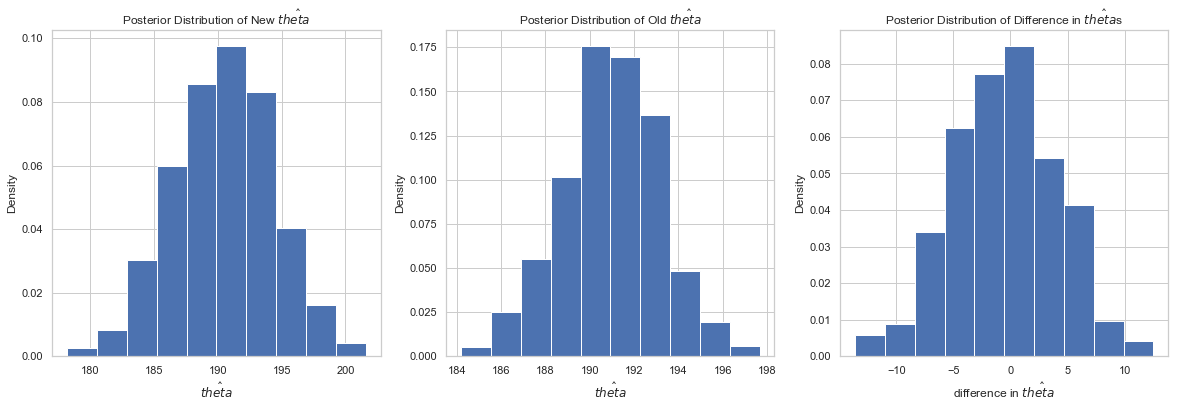

In [18]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)

axes.hist( new_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of New $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( old_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Old $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference2, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [19]:
print( "90% BCI for new theta:", stats.mstats.mquantiles( new_posterior, [0.05, 0.95]))
print( "90% BCI for old theta:", stats.mstats.mquantiles( old_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference2, [0.05, 0.95]))

90% BCI for new theta: [184.0492 196.8654]
90% BCI for old theta: [187.2441 194.5077]
90% BCI for difference: [-7.9003  6.6895]


In [20]:
theta_est = np.mean(difference2)
print(theta_est)

-0.5012199999999992


Q1 Test the engineer's claim that the new batteries run at least 7 minutes longer than the old.

In [21]:
print ("P(new batteries run at least 7 mins longer) = ",np.mean(difference2 >=7))

P(new batteries run at least 7 mins longer) =  0.042


There is 4.2% chance the claim is true

Q2 If plus or minus 5 minutes is "equivalent", what is the probability that the batteries have the same operating life

In [22]:
print ("P(batteries have the same life) = ", np.mean((-5 <= difference2) & (difference2 <= 5)))

P(batteries have the same life) =  0.709


There is a 70.9%chance that batteries have the same operating life if +/- 5 is considered equivalent

**Question 3.**

In a recent survey, on an important question of economic revitalization, men and women responded as follows:

```
                   Response
                     Yes  No  Total
       Gender    Men  30  70  100
               Women  45  55  100
```

Based on the data, what is the probability that the women were in favor of the question? 

- Generate Data

In [23]:
np.random.seed([19921102])

men_theta = 0.30
men_data = [1] * 30 + [0] * 70
np.random.shuffle( men_data)
print( "men's data: ", men_data[0:20])

women_theta = 0.45
women_data = [1] * 45 + [0] * 55
np.random.shuffle( women_data)
print( "women's data: ", women_data[0:20])

men's data:  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]
women's data:  [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]


- Generate the bootstrap data for each

In [24]:
mens_mean = np.mean( men_data)
print( "men's mean=", mens_mean)
womens_mean = np.mean( women_data)
print( "women's mean=", womens_mean)
print( "difference=", womens_mean - mens_mean)

men's mean= 0.3
women's mean= 0.45
difference= 0.15000000000000002


In [25]:
men_posterior = bootstrap_sample( men_data, np.mean, 1000)
women_posterior = bootstrap_sample( women_data, np.mean, 1000)

- Calculate the difference

In [26]:
difference3 = women_posterior - men_posterior

- Plot the posterior distributions

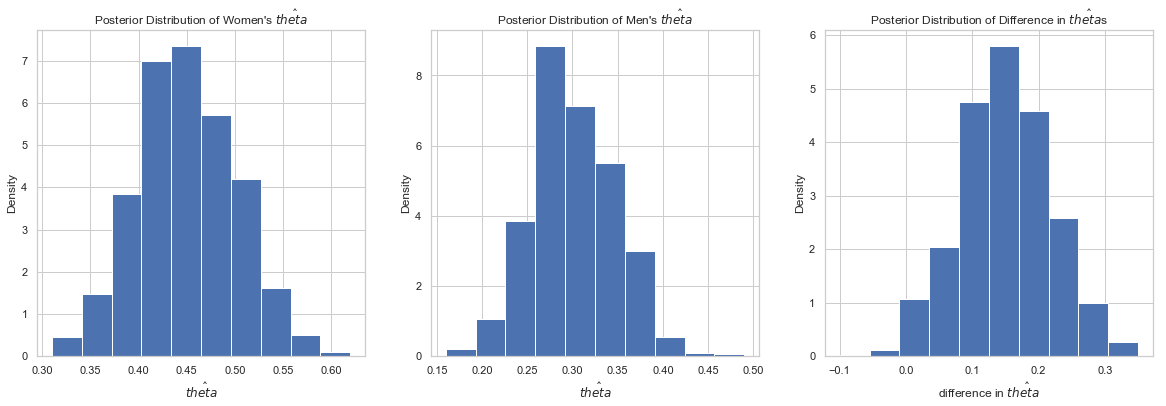

In [27]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)
axes.hist( women_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Women's $\hat{theta}$")


axes = figure.add_subplot(1, 3, 2)

axes.hist( men_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Men's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference3, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

- 90% BCI

In [28]:
print( "90% BCI for men's theta:", stats.mstats.mquantiles( men_posterior, [0.05, 0.95]))
print( "90% BCI for women's theta:", stats.mstats.mquantiles( women_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference, [0.05, 0.95]))

90% BCI for men's theta: [0.23 0.37]
90% BCI for women's theta: [0.37 0.54]
90% BCI for difference: [-14.06666667  26.09066667]


Question: based on the data, what is the probability that the women were in favor of the question? 

In [29]:
print ("P(women are in favour of the question) = ",np.mean(difference3>0))

P(women are in favour of the question) =  0.983


Therefore, there is a 98.3% chance that women were in favor of the question

**Question 4.**

In the above question you were able to regenerate the data. In the case of a continuous numeric variable, we're not exactly able to do this. However, given a parameterization and some assumptions about the underlying distribution, there are two possible approaches to solving this problem.

1. We could generate a single sample of size N from the distribution and do M bootstrap samples. (Method 1).
2. We could generate M samples of size N directly from the distribution. (Method 2).

Compare these approaches with the following problem:

"Within a school district, students were randomly assigned to one of two Math teachers - Mrs. Smith and Mrs. Jones. After the assignment, Mrs. Smith had 30 students, and Mrs. Jones had 25 students.

"At the end of the year, each class took the same standardized test. Mrs. Smith's students had an average test score of 78, with a standard deviation of 10; and Mrs. Jones' students had an average test score of 85, with a standard deviation of 15.

"What is the probability that Mrs. Smith and Mrs. Jones are equally effective teachers."

Using N = 100 and M = 100:

1. Define what "equally effective might mean".
2. Answer the question using Method 1.
3. Answer the question using Method 2.
4. Comment on any observed similarities or differences between the two results.

1. Define what "equally effective might mean".

In Bayesian Statistics, we often identify a range of possible values for a parameter that we consider the same. This is known as the ROPE (Region of Practical Equivalance). For our question, "equially effective" might mean ROPE for the difference between two class is centered at 0 and we can assume +/- 2.5 to be considered about zero. Therefore +/- 2.5 is our ROPE for the difference in the marks, if the difference is within this range, we would consider two teachers are equally effective.

2. Answer the question using Method 1.

Method: We could generate a single sample of size N from the distribution and do M bootstrap samples. (Method 1).

In [30]:
np.random.seed(19921101)

- Generate single sample of size 100

In [31]:
s_mu = 78
s_s = 10
s_n = 30

j_mu = 85
j_s = 15
j_n = 25

data4 = {}

data4["sclass"] = np.random.normal( s_mu, s_s, 100)
data4["jclass"] = np.random.normal( j_mu, j_s, 100)

print("s class mean: ", np.mean(data4["sclass"]))
print("j class mean: ", np.mean(data4["jclass"]))



s class mean:  77.15154244649801
j class mean:  83.68779008372188


- Generate the 100 bootstrap data for each

In [32]:
s_posterior = bootstrap_sample(data4["sclass"], np.mean, 100)
j_posterior = bootstrap_sample(data4["jclass"], np.mean, 100)

- Calculate the difference

In [33]:
difference5 = s_posterior - j_posterior

- Plot the posterior distributions

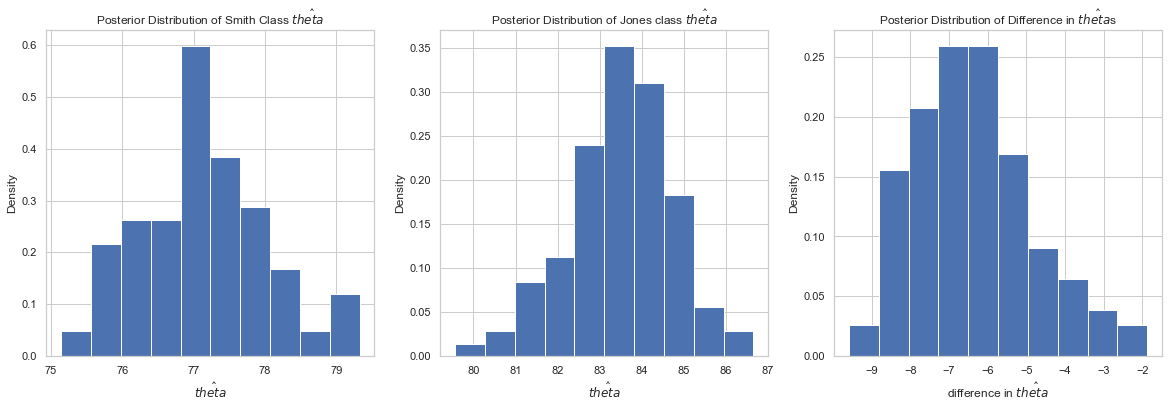

In [34]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( s_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Smith Class $\hat{theta}$")


axes = figure.add_subplot(1, 3, 2)

axes.hist( j_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Jones class $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference5, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

- 90% BCI

In [35]:
print( "90% BCI for smith class theta:", stats.mstats.mquantiles( s_posterior, [0.05, 0.95]))
print( "90% BCI for jones class theta:", stats.mstats.mquantiles( j_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference5, [0.05, 0.95]))

90% BCI for smith class theta: [75.79802775 78.83363345]
90% BCI for jones class theta: [81.41025078 85.56810158]
90% BCI for difference: [-8.59408259 -3.5580456 ]


Q - What is the probability that Mrs. Smith and Mrs. Jones are equally effective teachers.

In [36]:
print ("P(two teachers are equally effective) = ",np.mean((-2.5 <= difference5) & (difference5 <= 2.5)))

P(two teachers are equally effective) =  0.02


There are 2% chance that two teacherrs are equally effective

3. Answer the question using Method 2.

Method: We could generate M samples of size N directly from the distribution. (Method 2).

- generate 100 samples of size 100

In [37]:
np.random.seed(19921101)
sclassdata = []

sclassdata = np.array(np.random.normal( s_mu, s_s, 100*100))
jclassdata = np.array(np.random.normal( j_mu, j_s, 100*100))

difference6 =  sclassdata - jclassdata 



- Plot

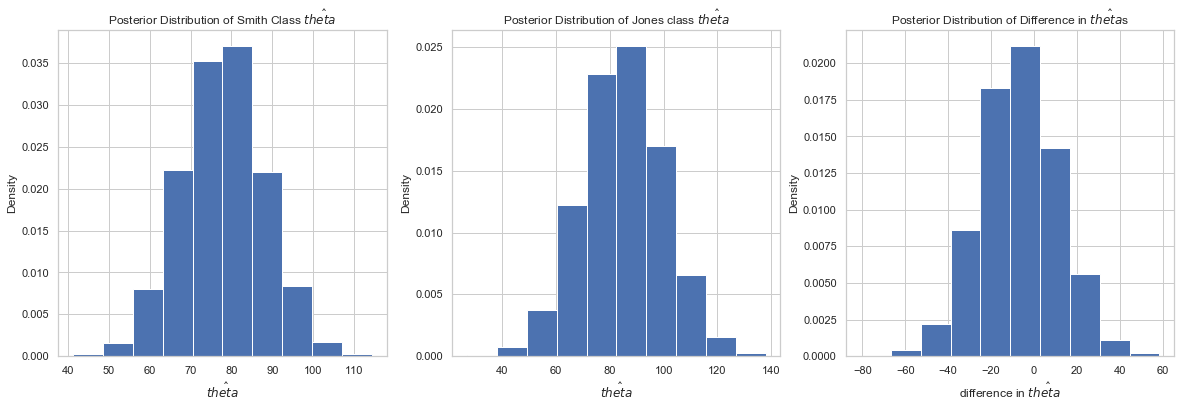

In [38]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( sclassdata, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Smith Class $\hat{theta}$")


axes = figure.add_subplot(1, 3, 2)

axes.hist( jclassdata, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Jones class $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference6, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

90% BCI

In [40]:
print( "90% BCI for smith class theta:", stats.mstats.mquantiles( sclassdata, [0.05, 0.95]))
print( "90% BCI for jones class theta:", stats.mstats.mquantiles( jclassdata, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference6, [0.05, 0.95]))

90% BCI for smith class theta: [61.54004256 94.43740018]
90% BCI for jones class theta: [ 60.00341868 109.49017395]
90% BCI for difference: [-36.34937601  22.88502663]


Q - What is the probability that Mrs. Smith and Mrs. Jones are equally effective teachers.

In [41]:
print ("P(two teachers are equally effective) = ",np.mean((-2.5 <= difference6) & (difference6 <= 2.5)))

P(two teachers are equally effective) =  0.1019


There are 10% chance that two teachers are equally effective

Method 1

In [42]:
print( "mean of smith class: ", np.mean(s_posterior))
print( "mean of jones class: ", np.mean(j_posterior))
print( "mean of difference: ", np.mean(difference5))
print( "std of smith class: ", np.std(s_posterior))
print( "std of jones class: ", np.std(j_posterior))
print( "std of difference: ", np.std(difference5))
print( "90% BCI for smith class theta:", stats.mstats.mquantiles( s_posterior, [0.05, 0.95]))
print( "90% BCI for jones class theta:", stats.mstats.mquantiles( j_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference5, [0.05, 0.95]))

mean of smith class:  77.13052986158641
mean of jones class:  83.50501177751329
mean of difference:  -6.374481915926871
std of smith class:  0.8640055360429832
std of jones class:  1.2625838358991535
std of difference:  1.5190633194511807
90% BCI for smith class theta: [75.79802775 78.83363345]
90% BCI for jones class theta: [81.41025078 85.56810158]
90% BCI for difference: [-8.59408259 -3.5580456 ]


Method 2

In [43]:
print( "mean of smith class: ", np.mean(sclassdata))
print( "mean of jones class: ", np.mean(jclassdata))
print( "mean of difference: ", np.mean(difference6))
print( "std of smith class: ", np.std(sclassdata))
print( "std of jones class: ", np.std(jclassdata))
print( "std of difference: ", np.std(difference6))
print( "90% BCI for smith class theta:", stats.mstats.mquantiles( sclassdata, [0.05, 0.95]))
print( "90% BCI for jones class theta:", stats.mstats.mquantiles( jclassdata, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference6, [0.05, 0.95]))

mean of smith class:  77.88053714486142
mean of jones class:  84.7901637450364
mean of difference:  -6.909626600174972
std of smith class:  10.05506751705388
std of jones class:  15.111254983110687
std of difference:  18.087398731258947
90% BCI for smith class theta: [61.54004256 94.43740018]
90% BCI for jones class theta: [ 60.00341868 109.49017395]
90% BCI for difference: [-36.34937601  22.88502663]


Based on above statistics and results, both results have a similar mean for the class marks and mark differences. However, methods 2 gives much wider BCI range and higher standard deviations. From the plot, we see method 1 gives a bit skewed normal distribution as it always bootstrap on a similar data set whereas method 2 gives a non-skewed normal distribution with much wider range. As a result, method 1 gives 2% probability whereas method 2 gives 10% probability.